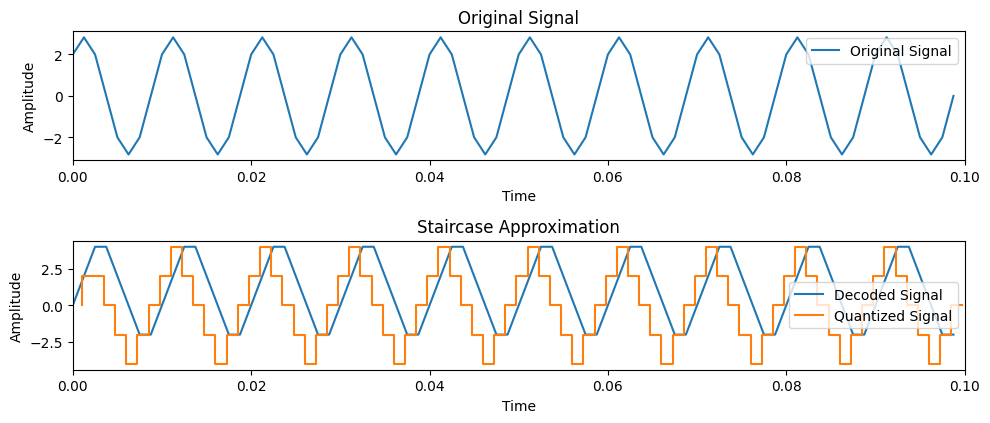

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Function to encode a signal using a Delta Modulator Encoder
def delta_modulator_encoder(signal, step_size):
    quantized_signal = np.zeros_like(signal)
    error = np.zeros_like(signal)

    for i in range(1, len(signal)):
        error[i] = signal[i] - quantized_signal[i - 1]
        quantized_signal[i] = (quantized_signal[i - 1] + step_size * np.sign(error[i]))

    return quantized_signal, error

# Function to decode a signal using a Delta Modulator Decoder
def delta_modulator_decoder(quantized_signal, step_size):
    decoded_signal = np.zeros_like(quantized_signal)

    for i in range(1, len(quantized_signal)):
        decoded_signal[i] = decoded_signal[i - 1] + step_size * np.sign(quantized_signal[i])

    return decoded_signal

# Generate a sinusoidal signal
fs = 800  # Sampling frequency
# fs = 1000  # Sampling frequency
t = np.arange(0, 0.1, 1/fs)
sinusoidal_signal = 2 * np.sin(2 * np.pi * 100 * t) + 2 * np.cos(2 * np.pi * 100 * t)   # 5 Hz sinusoidal signal

# Parameters for Delta Modulator
step_size = 2

# Encode the signal using Delta Modulator
quantized_signal, error = delta_modulator_encoder(sinusoidal_signal, step_size)

# Decode the signal using Delta Modulator
decoded_signal = delta_modulator_decoder(quantized_signal, step_size)

# Plot the original and quantized signals
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, sinusoidal_signal, label='Original Signal')
plt.xlim(0.0,0.1)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, decoded_signal, label='Decoded Signal')
plt.title('Decoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# plt.subplot(3, 1, 2)
plt.plot(t+0.001, quantized_signal, label='Quantized Signal', drawstyle='steps-pre')
plt.xlim(0.0,0.1)
plt.title('Staircase Approximation')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()


plt.tight_layout()
plt.show()


Text(0, 0.5, 'Amplitude')

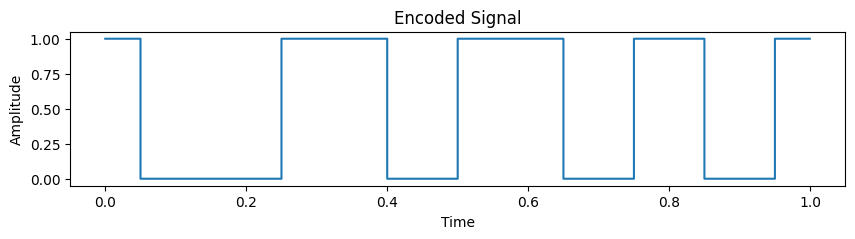

In [2]:
def encode(data):
    encoded_data = []
    for bit in data:
        encoded_data.extend([bit] * 100)  # Each bit is represented by 100 samples
    return np.array(encoded_data)

# Generate binary data
binary_data = np.random.randint(0, 2, size=20)

# Encode the data using nez encoding
encoded_data = encode(binary_data)
t1 = np.arange(0, 1, 1/len(encoded_data))

plt.figure(figsize=(10, 2))
plt.step(t1, encoded_data, where='post')
plt.title('Encoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')


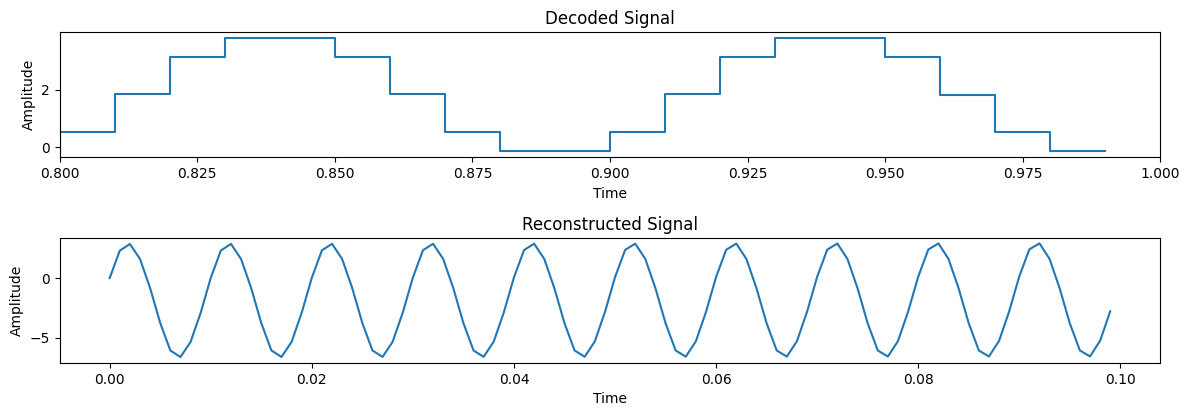

In [3]:
def adaptive_delta_modulation_encoder(signal, step_size, beta):
    quantized_signal = np.zeros_like(signal)
    error = np.zeros_like(signal)
    step_size_values = []

    for i in range(1, len(signal)):
        delta = signal[i] - signal[i - 1]
        if delta >= step_size:
            quantized_signal[i] = quantized_signal[i - 1] + step_size
        elif delta <= -step_size:
            quantized_signal[i] = quantized_signal[i - 1] - step_size
        else:
            quantized_signal[i] = quantized_signal[i - 1]
        
        step_size = step_size * np.exp(beta * (delta ** 2))
        step_size_values.append(step_size)

    return quantized_signal, step_size_values

# Function for Adaptive Delta Modulation Decoder
def adaptive_delta_modulation_decoder(quantized_signal):
    decoded_signal = np.zeros_like(quantized_signal)

    for i in range(1, len(quantized_signal)):
        decoded_signal[i] = decoded_signal[i - 1] + quantized_signal[i]

    return decoded_signal

# Generate a sinusoidal signal
fs = 1000  # Sampling frequency
fm = 100     # Frequency of the sinusoidal signal
delta = 2 * np.pi * (fm / fs)

t = np.arange(0, 0.1, 1/fs)
t1 = np.arange(0, 1, 0.01)
sinusoidal_signal = 5 * np.sin(2 * np.pi * fm * t)

# Parameters for Adaptive Delta Modulation
initial_step_size = delta
beta = 0.0001

#  Generate binary data
binary_data = np.random.randint(0, 2, size=40)


# Encode the signal using Adaptive Delta Modulation
quantized_signal, step_size_values = adaptive_delta_modulation_encoder(sinusoidal_signal, initial_step_size, beta)

# Encode the data using NRZ encoding

# Decode the signal using Adaptive Delta Modulation
decoded_signal = adaptive_delta_modulation_decoder(quantized_signal)

# Plot the signals
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(t1, decoded_signal,drawstyle='steps-pre')
plt.title('Decoded Signal')
plt.xlim(0.8,1.0)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 2)
plt.plot(t, sinusoidal_signal - decoded_signal)
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
